# MNIST Image Classification - Tensorflow and Keras

MNIST Dataset – The dataset has 60,000 small squares of 28*28 pixel images of handwritten single digits ranging from 0 to 9.
   

 Problem Statement - To create a  Deep learning model which classify the image with better accuracy

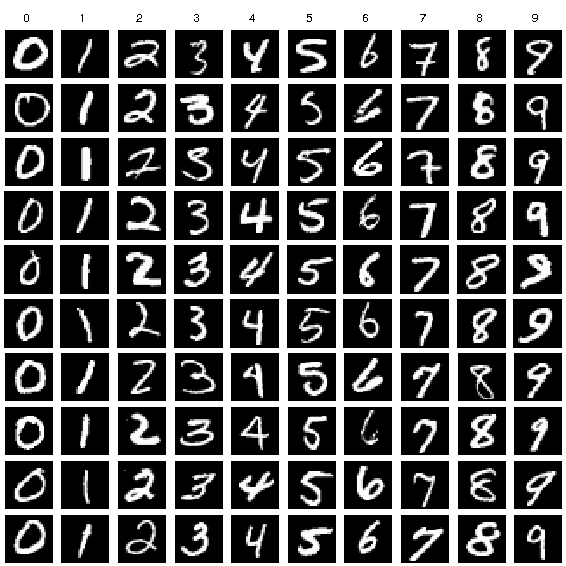

In [2]:
#MNIST dataset - Handwritten Image (60,000) of digits from 0-9 (10 class). Every image is 28*28 pixel having colour range from 0 to 255(by deafult)
#Each image has 28*28 pixel = 78 pixel , hence 784 neuron in input layer (2D to flattening layer which happens only in image)
#10 neurons in the output layer since 10 classes (0-9) to be classified with softmax function
#Will keep hidden layer in between with relu function
#only the pixel with label are given weights while the pixels without the labels are not provided the weights, weights are also provided in pixels

# Image Classification

## Data: MNIST handwritten digits 0 to 9



In [3]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import tensorflow as tf # Import tensorflow library
from keras.datasets import mnist


## Load the dataset

In [4]:
mnist = tf.keras.datasets.mnist # Object of the MNIST dataset
(X_train, y_train),(X_test, y_test) = mnist.load_data() # Load data

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
X_train[1]
#The pixel colour ranges from 0 to 255, here.This will ask for heavy weights which will take time to converge
# Hence, normalization, where value of colour is divided by 255, and then the range of colour value will vary from 0 to 1


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

# Normalizing Image data 


The data has been normalized to (0-1) from (0-255) by dividing each value by 255. Now we can assign small weights which will take less time to converge

In [6]:
# Normalize the train dataset between 0 and 1, utils is used for normalization
X_train = tf.keras.utils.normalize(X_train, axis=1)
# Normalize the test dataset
X_test = tf.keras.utils.normalize(X_test, axis=1)

In [7]:
X_train[1]
#Now small weights can be assigned to these neurons(pixel), since their colour value ranges from 0 to 1 now.

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [8]:
print('shape of training data:',X_train.shape)
print('shape of training lables:',y_train.shape)
print('shape of test data:',X_test.shape)
print('shape of test labels:',y_test.shape)

shape of training data: (60000, 28, 28)
shape of training lables: (60000,)
shape of test data: (10000, 28, 28)
shape of test labels: (10000,)


# Build the model

1. Input layer - It contains 28*28 = 784 neurons which is further flattened from 2-dimensional
2. Hidden layer 1 - The hidden layer has 64 neurons with relu as the activation function
3. Hidden layer 2 - The hidden layer has 64 neurons with relu as the activation function
4. Output layer - The layer has 10 neuron as there are 10 classifiers (0 - 9) with softmax function, which will give probabilities for each class. And the class with highest probability is given as output

In [10]:
#Build the model object, input layer has 28*28 neurons in the input layer by default
model = tf.keras.models.Sequential()
# Add the Flatten Layer
model.add(tf.keras.layers.Flatten())
# Build the input and the hidden layers
model.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
# Build the output layer
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

# Compile the model

1. Optimizer - adam will help in generating optimal weights, learning from previous weights. Another method is gradient descent for generating optimal weights
2. Cross entropy - It helps in generating maximum probability for the correct classifier, after running epochs and iterations. This reduces the loss function
3. Accuracy - It helps in understanding how good and reliable is the model.

In [11]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Train the model


The model is fitted into the train models with 5 epochs. 1 epochs contain 784 iterations.

In [12]:
#model.fit(X_train,to_categorical(y_train), epochs = 10, batch_size=32), 1 epoch = 784 iteration
hist = model.fit(X_train, y_train, epochs = 5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3165 - accuracy: 0.9099
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1454 - accuracy: 0.9559
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1053 - accuracy: 0.9667
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0830 - accuracy: 0.9733
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0674 - accuracy: 0.9785


# Evaluate the model

In [13]:
# Evaluate the model performance
test_loss, test_acc = model.evaluate(x=X_test, y=y_test)
# Print out the model accuracy 
print('\nTest accuracy:', test_acc)


313/313 [==============================] - 1s 2ms/step - loss: 0.1063 - accuracy: 0.9675

Test accuracy: 0.9674999713897705


In [14]:
#Print model accuracy and loss, same as above
#model.evaluate(
#    X_test,
#    (y_test)
#)

Predict first 5 images

In [15]:
pred = model.predict(X_test[:10])
print(np.argmax(pred, axis = 1))
print(y_test[:10])

[7 2 1 0 4 1 4 9 5 9]
[7 2 1 0 4 1 4 9 5 9]


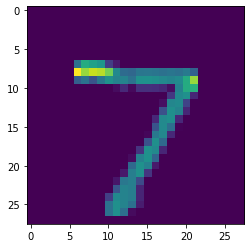

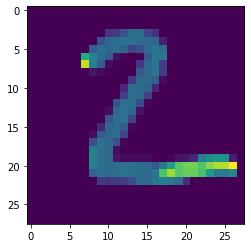

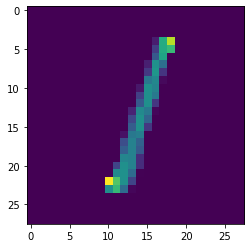

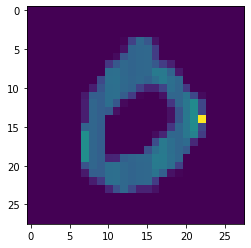

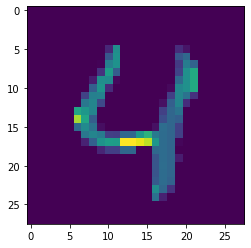

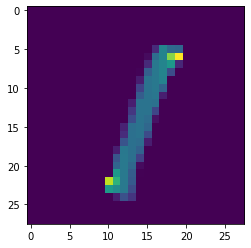

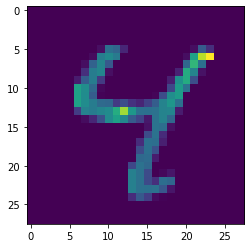

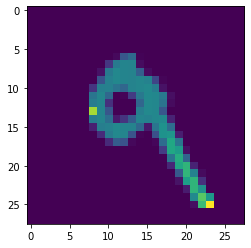

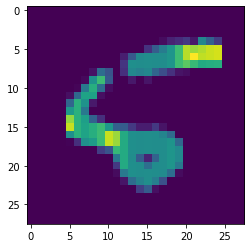

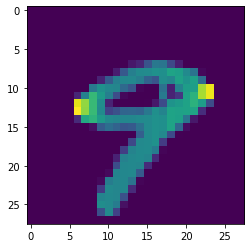

In [16]:
for i in range(0,10):
  first_image = X_test[i]
  first_image = np.array(first_image, dtype='float')
  pixels = first_image.reshape(28,28)
  plt.imshow(pixels)
  plt.show()
